In [ ]:
# use this code in the anaconda prompt, not in jupyter notebook
#conda install -c conda-forge python-annoy
#pip install bbknn

^C


In [1]:
import bbknn

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.9.12) on 2023-04-16 12:42.


In [3]:
import seaborn as sns
import matplotlib as mpl
import plotly.graph_objects as go
from pySankey.sankey import sankey
import holoviews as hv

In [4]:
import seaborn as sns
import matplotlib as mpl
import plotly.graph_objects as go
from pysankey2 import Sankey
import matplotlib.pyplot as plt

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 louvain==0.7.1 pynndescent==0.5.6


In [6]:
import os
os.chdir('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4')

In [7]:
import scanpy.external as sce

In [9]:
adata = sc.read('Group_ABC_after_celltype_clustering_Myel_Tcell_group_added.h5ad')

In [10]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,percent_mt2,n_counts,celltype,crude,celltype_detail,patient_cluster,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4
AAACCTGAGTAGCCGA-1-0-0,3934.0,3879,1452.073242,18.802568,1.294877,tumor,P686,6,0,198.197769,...,0.012949,1452.073242,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGCAAGAGGCT-1-0-0,674.0,669,882.995728,11.229170,1.271713,tumor,P686,6,0,213.666718,...,0.012717,882.995728,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGCAGTATCTG-1-0-0,1014.0,1003,956.411804,18.788149,1.964441,tumor,P686,6,0,221.148575,...,0.019644,956.411804,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGCATGCCTTC-1-0-0,2607.0,2556,1262.646240,23.060396,1.826355,tumor,P686,14,0,161.333832,...,0.018264,1262.646240,14,Myeloid cell,M1 Macrophage,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGGTGCCTGGT-1-0-0,896.0,885,1091.559448,17.238060,1.579214,tumor,P686,6,0,176.360626,...,0.015792,1091.559448,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAAGCCATT-1-24-2,4456.0,4328,1867.209229,29.546848,1.582407,tumor,P001,0,2,172.502136,...,0.015824,1867.209229,0,T cell,CD4 T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3
TTTGGTTGTCACCCAG-1-24-2,689.0,642,487.017822,17.679008,3.630054,tumor,P001,5,2,59.435638,...,0.036301,487.017822,5,Plasma cell,Plasma cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3
TTTGTCAAGCGCTTAT-1-24-2,248.0,235,523.794067,8.050291,1.536919,tumor,P001,5,2,57.140697,...,0.015369,523.794067,5,Plasma cell,Plasma cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3
TTTGTCAGTCCTCTTG-1-24-2,2711.0,2644,1972.602417,24.433256,1.238631,tumor,P001,10,2,120.637726,...,0.012386,1972.602417,10,T cell,exhausted T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3


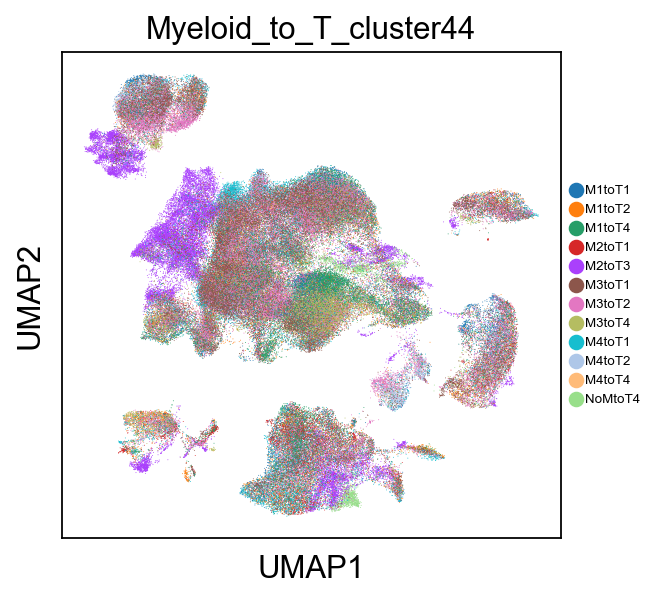

In [11]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",
],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",
],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",
],
             'M2toT1': ["P010",	"P130",
],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",
],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",
],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",
],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",
],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",
],
             'M4toT2': ["P019",	"P054",	"P128",
],
             'M4toT3': [],
             'M4toT4': ["P039",
],
             'NoMtoT4': ["P009A",
]}

# Initialize empty column in cell metadata
adata.obs['Myeloid_to_T_cluster44'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.patient).isin(cell_dict[i])
    adata.obs.loc[ind,'Myeloid_to_T_cluster44'] = i

sc.pl.umap(adata, color=['Myeloid_to_T_cluster44'], legend_loc='right margin', legend_fontsize=6)#, save='umap_allcell_Myeloid_to_T_cluster44.pdf')


In [12]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,n_counts,celltype,crude,celltype_detail,patient_cluster,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44
AAACCTGAGTAGCCGA-1-0-0,3934.0,3879,1452.073242,18.802568,1.294877,tumor,P686,6,0,198.197769,...,1452.073242,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3
AAACCTGCAAGAGGCT-1-0-0,674.0,669,882.995728,11.229170,1.271713,tumor,P686,6,0,213.666718,...,882.995728,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3
AAACCTGCAGTATCTG-1-0-0,1014.0,1003,956.411804,18.788149,1.964441,tumor,P686,6,0,221.148575,...,956.411804,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3
AAACCTGCATGCCTTC-1-0-0,2607.0,2556,1262.646240,23.060396,1.826355,tumor,P686,14,0,161.333832,...,1262.646240,14,Myeloid cell,M1 Macrophage,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3
AAACCTGGTGCCTGGT-1-0-0,896.0,885,1091.559448,17.238060,1.579214,tumor,P686,6,0,176.360626,...,1091.559448,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAAGCCATT-1-24-2,4456.0,4328,1867.209229,29.546848,1.582407,tumor,P001,0,2,172.502136,...,1867.209229,0,T cell,CD4 T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1
TTTGGTTGTCACCCAG-1-24-2,689.0,642,487.017822,17.679008,3.630054,tumor,P001,5,2,59.435638,...,487.017822,5,Plasma cell,Plasma cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1
TTTGTCAAGCGCTTAT-1-24-2,248.0,235,523.794067,8.050291,1.536919,tumor,P001,5,2,57.140697,...,523.794067,5,Plasma cell,Plasma cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1
TTTGTCAGTCCTCTTG-1-24-2,2711.0,2644,1972.602417,24.433256,1.238631,tumor,P001,10,2,120.637726,...,1972.602417,10,T cell,exhausted T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1


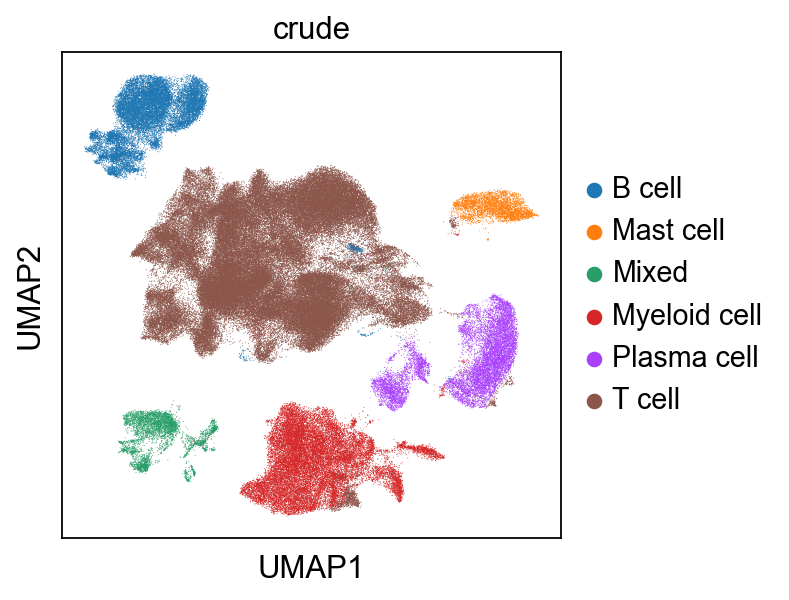

In [13]:
sc.pl.umap(adata, color=['crude'])

In [14]:
adata_MT = adata[adata.obs['crude'].isin(['Myeloid cell','T cell'])]

# Stopped here. No need to go further 04-16-23

In [15]:
#sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata_MT, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata_MT, max_value=10)
sc.tl.pca(adata_MT, svd_solver='arpack')
sc.pp.neighbors(adata_MT, n_neighbors=10, n_pcs=20)

regressing out ['total_counts', 'pct_counts_mt']


KeyboardInterrupt: 

In [ ]:
sc.tl.leiden(adata_MT)
sc.tl.umap(adata_MT)

In [ ]:
sc.pl.umap(adata_MT, color=['leiden','crude'])

In [ ]:
sc.pl.correlation_matrix(adata_MT, groupby='patient',cmap='YlGnBu')#, save='_T_cell_GroupABC_correlation_matrix.pdf')

In [ ]:
#############################################################
############ Harmony batch correction #######################
#############################################################

sce.pp.harmony_integrate(adata_MT, 'batch')
'X_pca_harmony' in adata_MT.obsm
True

In [ ]:
adata_MT.obsm['X_pca'] = adata_MT.obsm['X_pca_harmony']
sc.pp.neighbors(adata_MT)
sc.tl.pca(adata_MT)
sc.tl.umap(adata_MT)

In [ ]:
sc.pl.umap(adata_MT, color=['leiden','crude'])

In [ ]:
sc.pl.correlation_matrix(adata_MT, groupby='patient',cmap='YlGnBu')#, save='_T_cell_GroupABC_correlation_matrix.pdf')

In [ ]:
adata_MT_1 = adata_MT
adata_MT_1

In [ ]:
#same result
#adata_MT_1.obsm['X_pca'] = adata_MT_1.obsm['X_pca_harmony']
#sc.pl.umap(adata_MT_1, color=['leiden','crude'])

In [ ]:
#same result
#sc.pl.correlation_matrix(adata_MT_1, groupby='patient',cmap='YlGnBu')#, save='_T_cell_GroupABC_correlation_matrix.pdf')

In [ ]:
adata_MT_1.obsm['X_pca'] = adata_MT_1.obsm['X_pca_harmony']
sc.pp.neighbors(adata_MT_1)
sc.tl.umap(adata_MT_1)
sc.tl.leiden(adata_MT_1)

In [ ]:
# umap different
sc.pl.umap(adata_MT_1, color=['leiden','crude'])

In [ ]:
# but correlation matrix is the same
sc.pl.correlation_matrix(adata_MT_1, groupby='patient',cmap='YlGnBu')#, save='_T_cell_GroupABC_correlation_matrix.pdf')

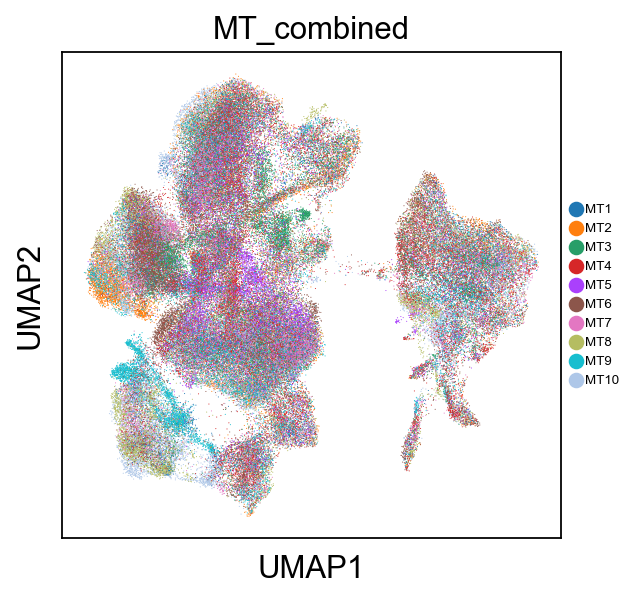

In [35]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'MT1': ['P017','P130','P016','P986','P787'],
             'MT2': ['P056','P063','P082','P038'],
             'MT3': ['P044','P104','P080','P084','P009B'],
             'MT4': ['P049','P087','P036','P023','P107','P026','P076','P021','P031','P128','P010'],
             'MT5': ['P001','P057','P002','P065'],
             'MT6': ['P009A','P019','P028','P024','P020','P127','P012','P030','P126','P039'],
             'MT7': ['P015','P061','P083','P686','P091'],
             'MT8': ['P846','P032','P052','P027','P047','P054','P040','P089'],
             'MT9': ['P048','P011','P094','P042','P079','P037','P062','P866'],
             'MT10': ['P051','P585','P658','P074','P181','P944','P075','P008','P022'],
             
            }

# Initialize empty column in cell metadata
adata_MT_1.obs['MT_combined'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_MT_1.obs.patient).isin(cell_dict[i])
    adata_MT_1.obs.loc[ind,'MT_combined'] = i

sc.pl.umap(adata_MT_1, color=['MT_combined'], legend_loc='right margin', legend_fontsize=6)#, save='umap_allcell_Myeloid_to_T_cluster44.pdf')


In [36]:
adata_MT_1.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,louvain,batch,total_counts_ribo,...,crude,celltype_detail,patient_cluster,T_patient_cluster,Myeloid_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44,leiden,MT_combined
AAACCTGAGCTGCAAG-1-0-0,696.0,680,837.446228,22.309502,2.663992,tumor,P686,9,0,97.282417,...,Myeloid cell,M1 Macrophage,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,16,MT7
AAACCTGAGTAGCCGA-1-0-0,3934.0,3875,1451.257568,18.802568,1.295605,tumor,P686,4,0,198.197769,...,T cell,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,6,MT7
AAACCTGCAAGAGGCT-1-0-0,674.0,668,882.023010,11.229170,1.273115,tumor,P686,4,0,213.666718,...,T cell,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,5,MT7
AAACCTGCAGTATCTG-1-0-0,1014.0,1000,954.569214,18.788149,1.968233,tumor,P686,4,0,221.148575,...,T cell,CD8 T cell,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,5,MT7
AAACCTGCATGCCTTC-1-0-0,2607.0,2556,1262.646240,23.060396,1.826355,tumor,P686,9,0,161.333832,...,Myeloid cell,M1 Macrophage,Group A,T_1,Myeloid_1,T_2,Myeloid_2,M2toT2,16,MT7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGCAAATCA-1-24-2,1375.0,1348,1473.825562,22.369625,1.517793,tumor,P001,2,2,184.743835,...,T cell,effector T cell,Group C,T_2,Myeloid_2,T_3,Myeloid_3,M3toT3,1,MT5
TTTGGTTAGTGGTAAT-1-24-2,1606.0,1572,1479.705078,29.242380,1.976230,tumor,P001,0,2,188.684555,...,T cell,CD4 T cell,Group C,T_2,Myeloid_2,T_3,Myeloid_3,M3toT3,4,MT5
TTTGGTTCAAGCCATT-1-24-2,4456.0,4321,1865.612427,29.546848,1.583761,tumor,P001,0,2,172.502136,...,T cell,CD4 T cell,Group C,T_2,Myeloid_2,T_3,Myeloid_3,M3toT3,0,MT5
TTTGTCAGTCCTCTTG-1-24-2,2711.0,2634,1966.213501,24.433256,1.242655,tumor,P001,7,2,120.637726,...,T cell,exhausted T cell,Group C,T_2,Myeloid_2,T_3,Myeloid_3,M3toT3,6,MT5


In [48]:
df = pd.DataFrame(adata_MT_1.obs)

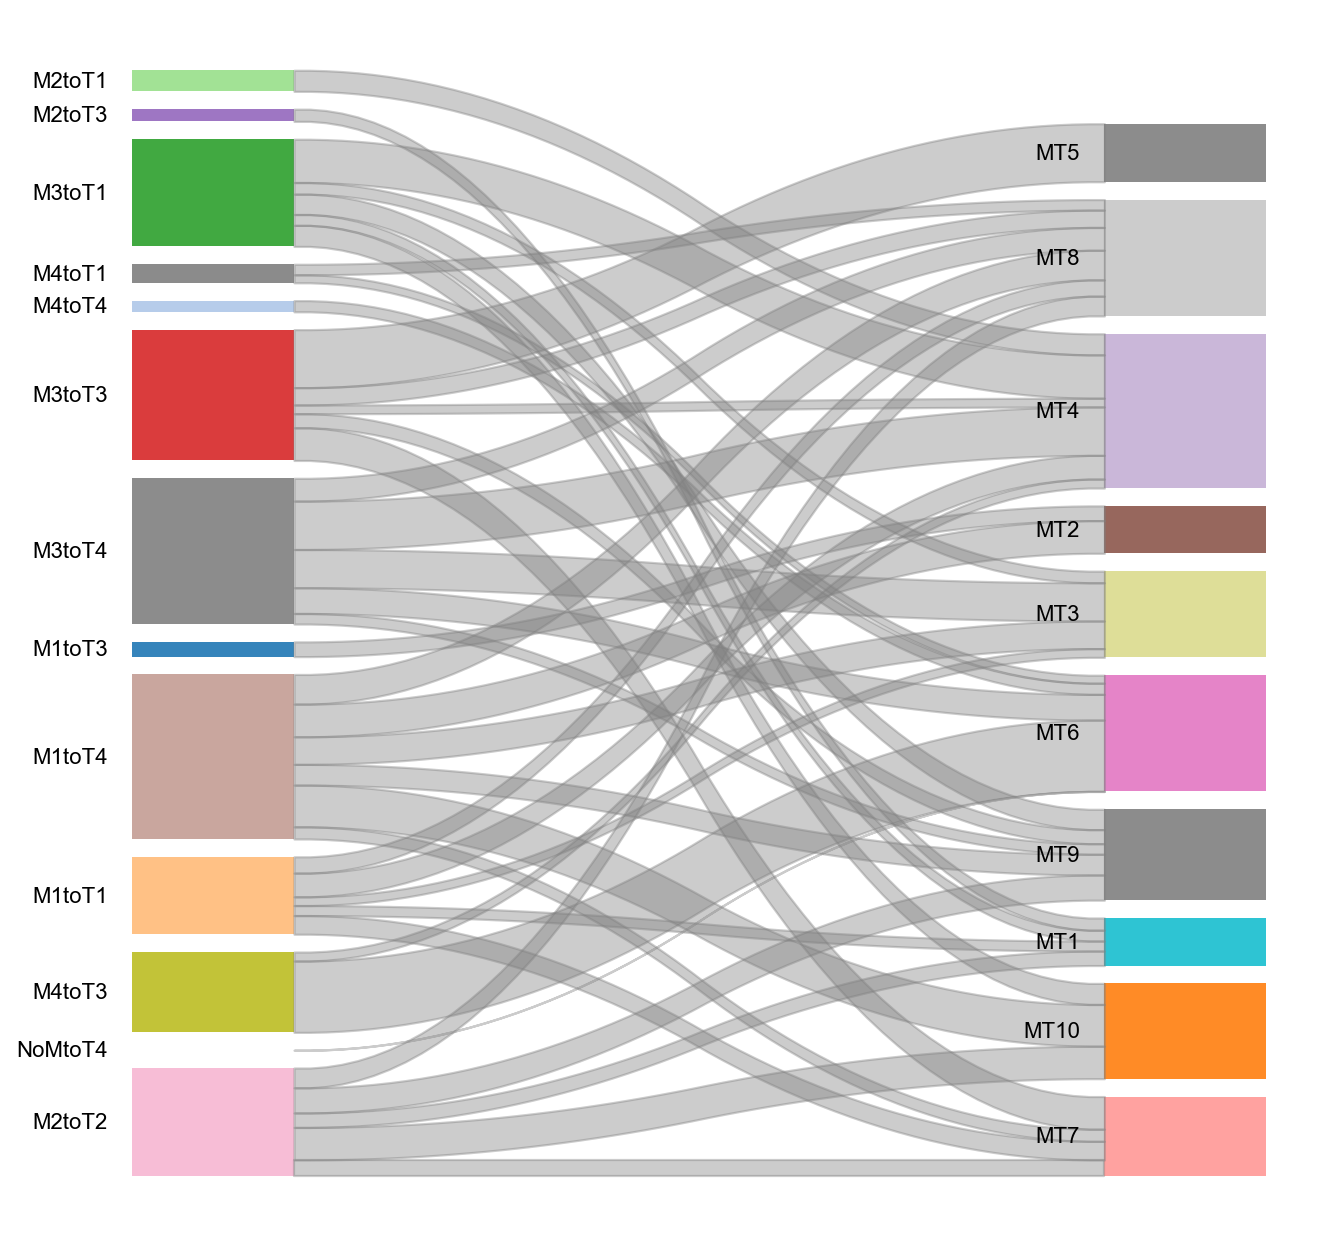

In [40]:
df_1 = df[['Myeloid_to_T_cluster44','MT_combined']]
sky_auto_global_colors = Sankey(df_1,colorMode="global")#,stripColor='left')
fig,ax = sky_auto_global_colors.plot()

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(10, 10)

# Set the color of the background to white
fig.set_facecolor("w")

# Save the figure
fig.savefig("Comparison_of_M-T_calss_with_Myeloid_T_cell_combined_1.pdf", bbox_inches="tight", dpi=300)

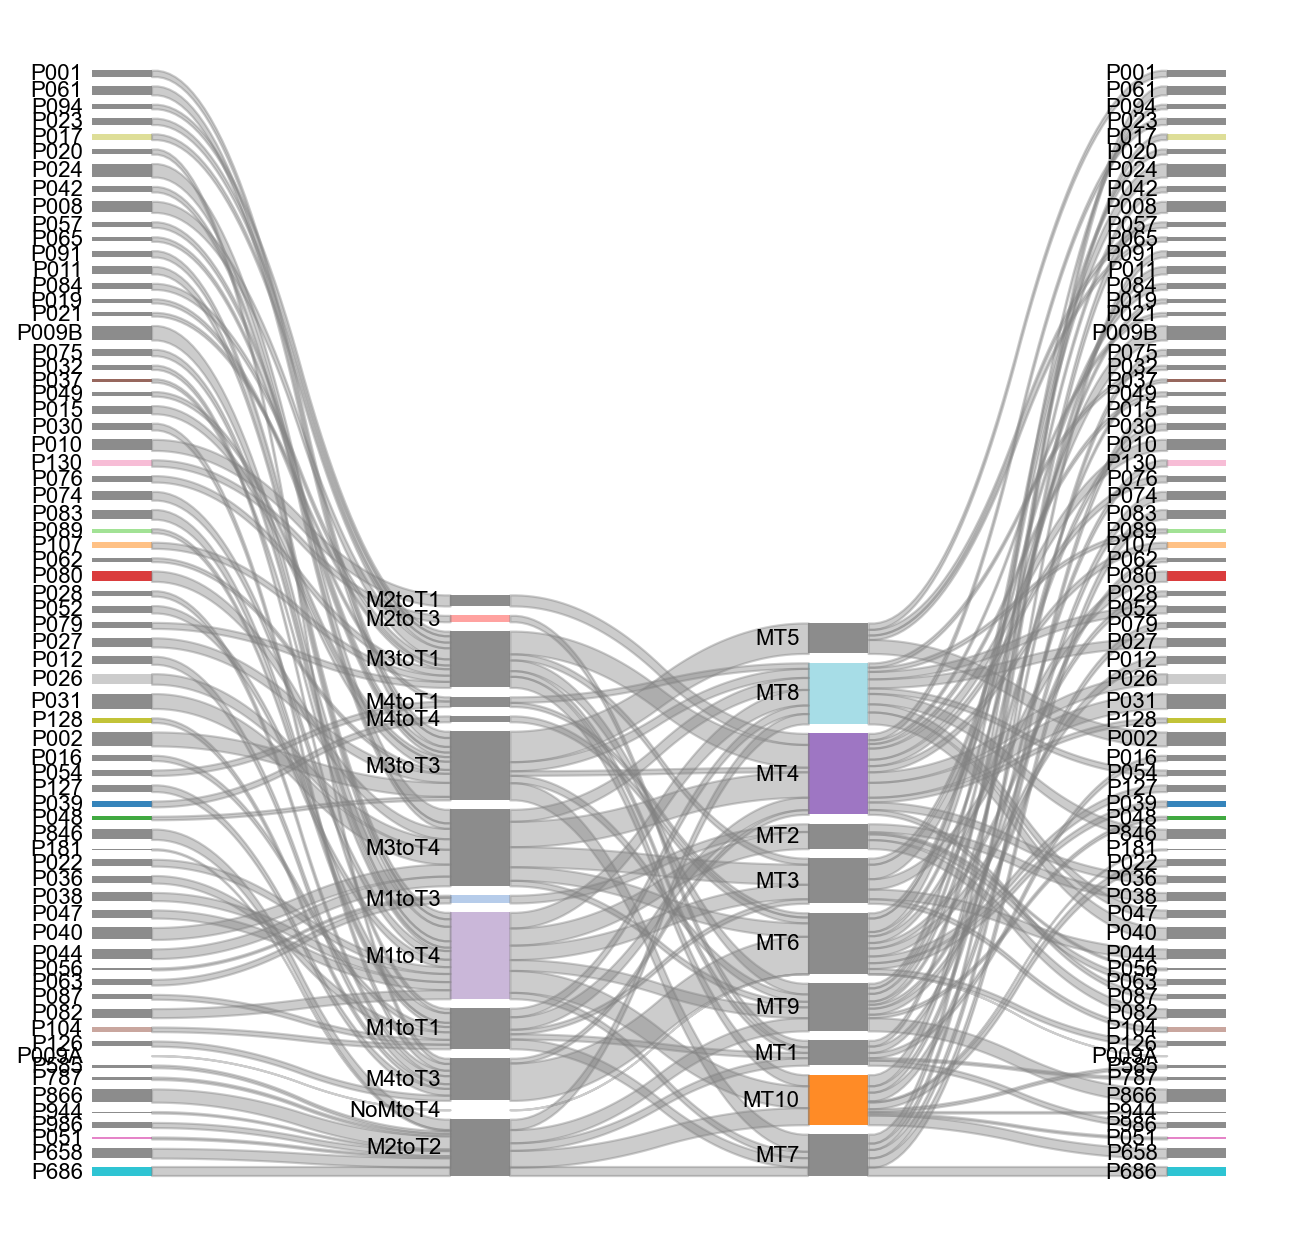

In [50]:
df_2 = df[['patient','Myeloid_to_T_cluster44','MT_combined','patient']]
sky_auto_global_colors = Sankey(df_2,colorMode="global")#,stripColor='left')
fig,ax = sky_auto_global_colors.plot()

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(10, 10)

# Set the color of the background to white
fig.set_facecolor("w")

# Save the figure
fig.savefig("Comparison_of_M-T_calss_with_Myeloid_T_cell_combined_2.pdf", bbox_inches="tight", dpi=300)

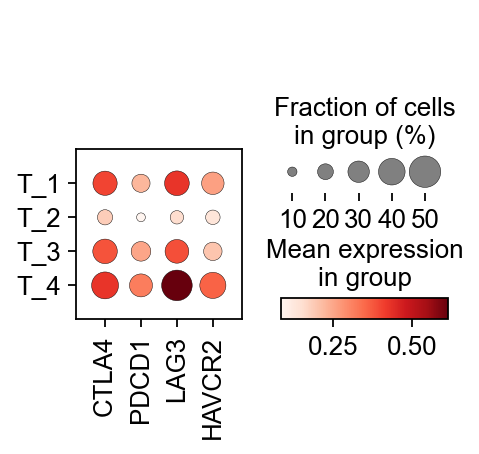

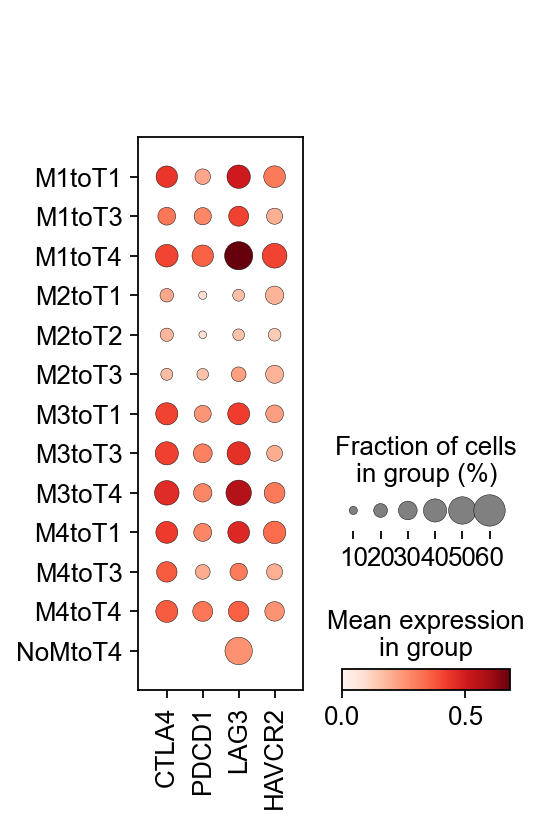

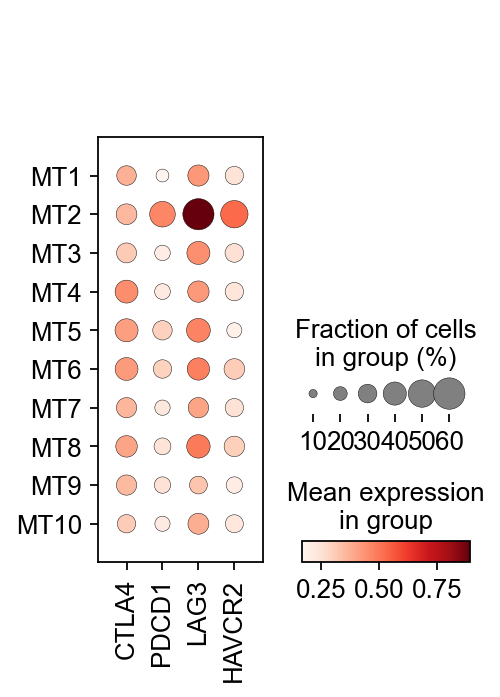

In [42]:
Texcell_geneset = ['CTLA4','PDCD1','LAG3','HAVCR2'] # exhausted T cell
sc.pl.dotplot(adata_MT_1, Texcell_geneset , 'T_patient_cluster4', dendrogram=False)
sc.pl.dotplot(adata_MT_1, Texcell_geneset , 'Myeloid_to_T_cluster44', dendrogram=False)
sc.pl.dotplot(adata_MT_1, Texcell_geneset , 'MT_combined', dendrogram=False)

In [43]:
adata_T = adata_MT_1[adata_MT_1.obs['crude']=='T cell']

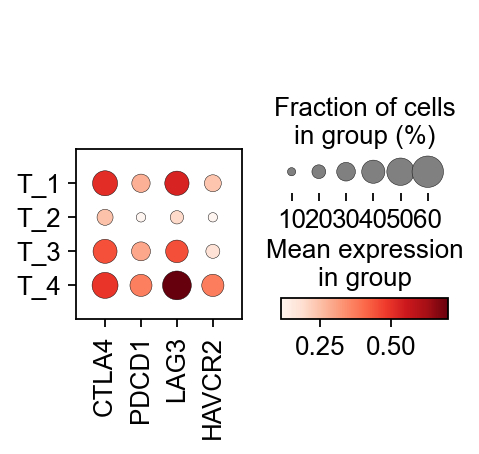

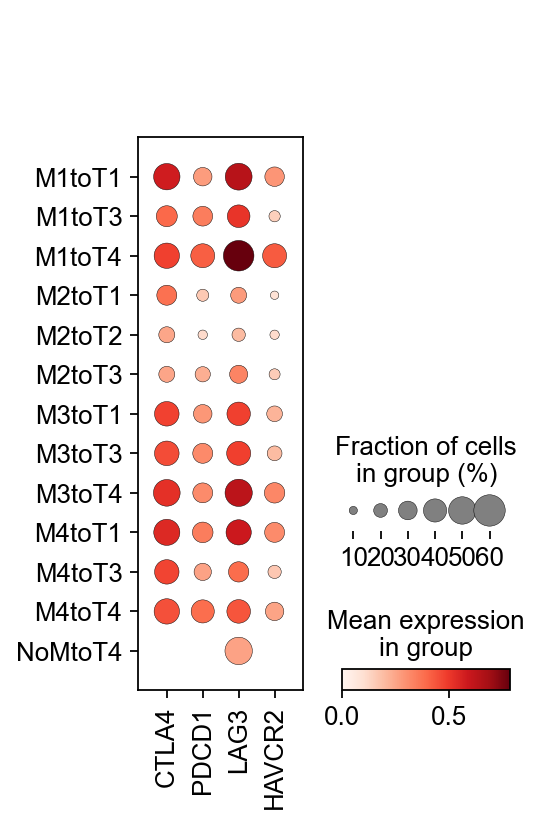

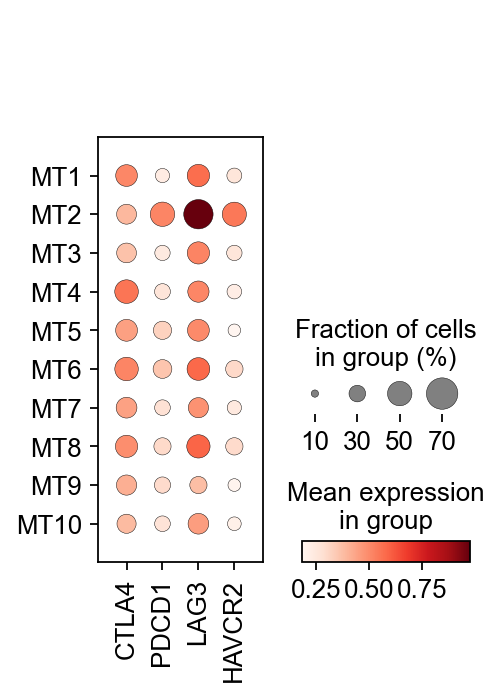

In [51]:
sc.pl.dotplot(adata_T, Texcell_geneset , 'T_patient_cluster4', dendrogram=False)
sc.pl.dotplot(adata_T, Texcell_geneset , 'Myeloid_to_T_cluster44', dendrogram=False)
sc.pl.dotplot(adata_T, Texcell_geneset , 'MT_combined', dendrogram=False, save='_exT_markers_in_MT-combined_class.pdf')

In [52]:
adata_MT_1.write('T_and_Myleoid_cell_isolated.h5ad', compression='gzip')